<a href="https://colab.research.google.com/github/mohd-faizy/08P_COVID19_Data_Analysis_Using_Python/blob/master/01_pandas_COVID_19_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __COVID-19 Data Visualization__

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


[__DataSet Source:__ _CSSEGISandData_](https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_daily_reports/08-07-2020.csv)

In [2]:
path = 'https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_daily_reports/08-21-2020.csv'
df = pd.read_csv(path)
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3949 entries, 0 to 3948
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   FIPS                 3254 non-null   float64
 1   Admin2               3259 non-null   object 
 2   Province_State       3781 non-null   object 
 3   Country_Region       3949 non-null   object 
 4   Last_Update          3949 non-null   object 
 5   Lat                  3869 non-null   float64
 6   Long_                3869 non-null   float64
 7   Confirmed            3949 non-null   int64  
 8   Deaths               3949 non-null   int64  
 9   Recovered            3949 non-null   int64  
 10  Active               3948 non-null   float64
 11  Combined_Key         3949 non-null   object 
 12  Incidence_Rate       3869 non-null   float64
 13  Case-Fatality_Ratio  3895 non-null   float64
dtypes: float64(6), int64(3), object(5)
memory usage: 432.0+ KB


,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key,Incidence_Rate,Case-Fatality_Ratio
0,NaN,NaN,NaN,Afghanistan,2020-08-22 04:27:49,33.93911,67.709953,37894,1385,28016,8493.0,Afghanistan,97.342962,3.654932
1,NaN,NaN,NaN,Albania,2020-08-22 04:27:49,41.15330,20.168300,8119,240,4096,3783.0,Albania,282.125235,2.956029
2,NaN,NaN,NaN,Algeria,2020-08-22 04:27:49,28.03390,1.659600,40667,1418,28587,10662.0,Algeria,92.738957,3.486857
3,NaN,NaN,NaN,Andorra,2020-08-22 04:27:49,42.50630,1.521800,1045,53,875,117.0,Andorra,1352.488190,5.071770
4,NaN,NaN,NaN,Angola,2020-08-22 04:27:49,-11.20270,17.873900,2068,94,804,1170.0,Angola,6.292166,4.545455


In [3]:
df.drop(['FIPS', 'Admin2','Last_Update','Province_State', 'Combined_Key'], axis=1, inplace=True)
df.rename(columns={'Country_Region': "Country"}, inplace=True)
df.head()

,Country,Lat,Long_,Confirmed,Deaths,Recovered,Active,Incidence_Rate,Case-Fatality_Ratio
0,Afghanistan,33.93911,67.709953,37894,1385,28016,8493.0,97.342962,3.654932
1,Albania,41.15330,20.168300,8119,240,4096,3783.0,282.125235,2.956029
2,Algeria,28.03390,1.659600,40667,1418,28587,10662.0,92.738957,3.486857
3,Andorra,42.50630,1.521800,1045,53,875,117.0,1352.488190,5.071770
4,Angola,-11.20270,17.873900,2068,94,804,1170.0,6.292166,4.545455


In [4]:
world = df.groupby("Country")['Confirmed','Active','Recovered','Deaths'].sum().reset_index()
world.head()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



,Country,Confirmed,Active,Recovered,Deaths
0,Afghanistan,37894,8493.0,28016,1385
1,Albania,8119,3783.0,4096,240
2,Algeria,40667,10662.0,28587,1418
3,Andorra,1045,117.0,875,53
4,Angola,2068,1170.0,804,94


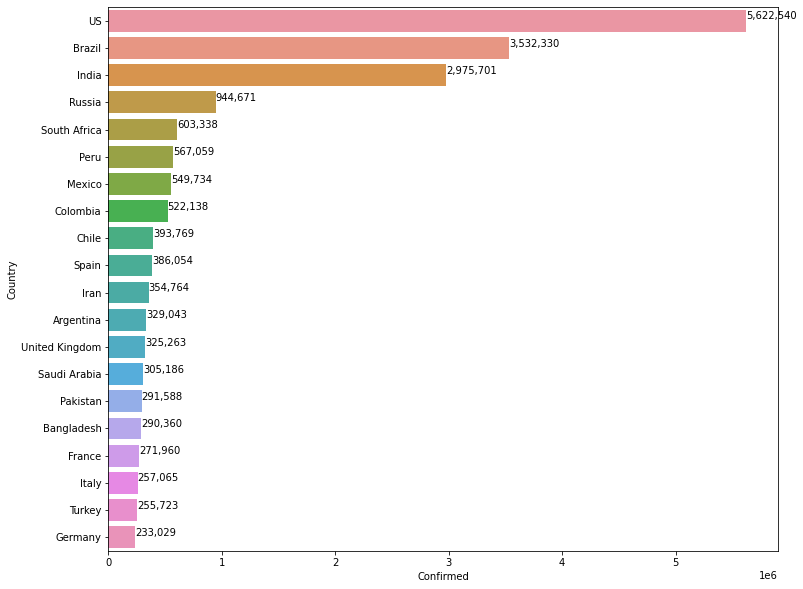

In [5]:
### Find top 20 countries with maximum number of confirmed cases
top_20 = world.sort_values(by=['Confirmed'], ascending=False).head(20)

### Generate a Barplot
plt.figure(figsize=(12,10))

plot = sns.barplot(top_20['Confirmed'], top_20['Country'])
for i,(value,name) in enumerate(zip(top_20['Confirmed'],top_20['Country'])):
    plot.text(value,i-0.05,f'{value:,.0f}',size=10)
plt.show()

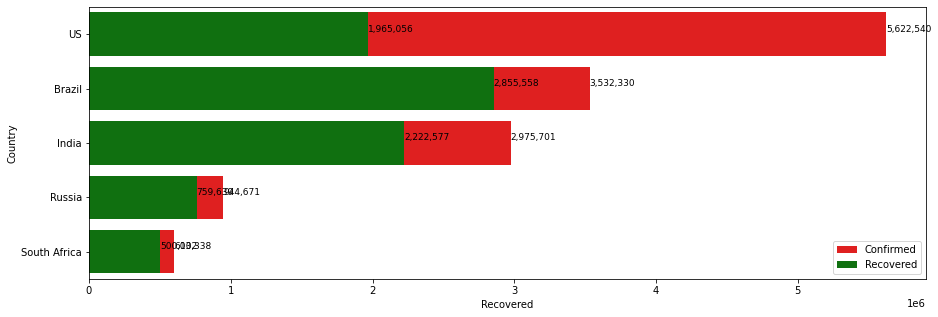

In [6]:
top_5 = world.sort_values(by=['Confirmed'], ascending=False).head()

### Generate a Barplot
plt.figure(figsize=(15,5))
confirmed = sns.barplot(top_5['Confirmed'], top_5['Country'], color = 'red', label='Confirmed')
recovered = sns.barplot(top_5['Recovered'], top_5['Country'], color = 'green', label='Recovered')

### Add Texts for Barplots
for i,(value,name) in enumerate(zip(top_5['Confirmed'],top_5['Country'])):
    confirmed.text(value,i-0.05,f'{value:,.0f}',size=9)
for i,(value,name) in enumerate(zip(top_5['Recovered'],top_5['Country'])):
    recovered.text(value,i-0.05,f'{value:,.0f}',size=9)
plt.legend(loc=4)
plt.show()

In [7]:
figure = px.choropleth(world, 
                       locations='Country',
                       locationmode='country names',
                       color='Confirmed',
                       hover_name='Country',
                       color_continuous_scale='tealgrn',
                       range_color=[1,1000000],
                       title='Countries with Confirmed cases')
figure.show()